# Домашнее задание пользователя MadSkills

> Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
> Также ответьте на вопрос:
> Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


Начнём с импорта чужих модулей:

In [49]:
# Импорт чужих модулей
import statistics as stat
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import IPython.display

spb = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
mgd = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

Дополним своей "библиотекой", которую я, в отличие от своего IDE, вставил прямо в ноутбук. Её можно просто проскроллить.

In [50]:
# Это мини-библиотека для сокращения
# объёма ноутбука.

# №1
#
# Функция для проверки,соответствуют
# ли списки друг другу по длине.

def chk_len(d_1, d_2):
    if len(d_1) != len(d_2):
        print('Длины списков не одинаковой длины:',\
            len(d_1),'и', len(d_2),'.\
            Используйте adj_len(список_один, список_два, метод).')
    else: print('Длины списков одинаковой длины.')

# №2
#
# Функция для унификации длин списков
# дабы при создании датафрейма не выва-
# ливалось ошибок.
#
# На вход принимает два списка и метод.
#
# Методы: заполнить разницу средним,
# медианным или NaN значением, дописав их
# строкой как 'mean', 'med' или 'nan'.
#
# Возвращает первый список из пары.

def adj_len(d_1, d_2, method='mean'):
    
    # Делаем копии списков, чтобы они
    # не изменились.
    data = d_1.copy()
    d_1, d_2 = d_1.copy(), d_2.copy()
    dif = len(d_1) - len(d_2)

    # Если разницы нет, просто сортировка.
    if dif == 0:
        return data.sort()
    
    # Подфункция, реализует выбор метода.
    def apply_method(data, method):
        if method == 'mean':
            return stat.mean(data)
        elif method == 'med':
            return stat.median(data)
        elif method == 'nan':
            return np.nan
    
    # Если второй лист больше первого,
    # заполняет разницу NaN или средним,
    # в зависимости от выбора.
    if dif > 0:
        return sorted(data)
    elif dif < 0:
        while dif < 0:
            # then d_1 > d_2
            data.append(apply_method(data, method))
            dif+=1
        return sorted(data)
    
# №3
#
# Эту команду я нашёл на StackOverflow:
# https://stackoverflow.com/a/50899244
# Она служит для расположения трёх DataFrame
# на одном уровне.
def tables_in_rows(df1, com_1, df2, com_2, df3, com_3):
    
    df1_styler = df1.style.set_table_attributes\
        ("style='display:inline'").set_caption(com_1)
    df2_styler = df2.style.set_table_attributes\
        ("style='display:inline'").set_caption(com_2)
    df3_styler = df3.style.set_table_attributes\
        ("style='display:inline'").set_caption(com_3)
    
    IPython.display.display_html(df1_styler._repr_html_()\
        +df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

# №3
#
# Эта команда прогоняет T-тeст на двух
# рядах датафрейма.
def t_test(data, alpha):
    H0 = 'Нет значимой разницы между средним размером раковины мидий в двух городах.'
    Ha = 'Есть значимая разница между средним размером раковины мидий в двух городах.'
    
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data.iloc[:,0], data.iloc[:,1],\
        equal_var=True, nan_policy='omit')

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")


In [51]:
chk_len(spb, mgd)

Длины списков не одинаковой длины: 7 и 8 .            Используйте adj_len(список_один, список_два, метод).


Как мы убедились, списки разной длины. Следовательно, нам необходимо как-то выровнять их, заполним разницу средним, медианным или NaN значением.

Для этого используется функция **adj_len**(list_1, list_2, method), где метод – это строка **med**, **mean** или **nan** соответственно. Далее, для вычислений мы будем пользоваться средним.
Также, посмотрим, как они коррелируют:

,sbp,mgd
0,0.081700,0.067700
1,0.096800,0.068500
2,0.097400,0.068900
3,0.101600,0.069700
4,0.103443,0.076400
5,0.105000,0.078100
6,0.106400,0.091500
7,0.135200,0.103300
,sbp,mgd
0,0.081700,0.067700


<AxesSubplot:>

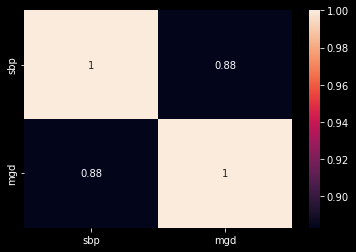

In [52]:
midias_mean = pd.DataFrame({'sbp':adj_len(spb, mgd, 'mean'),\
    'mgd':adj_len(mgd, spb, 'mean')})
midias_med = pd.DataFrame({'sbp':adj_len(spb, mgd, 'med'),\
    'mgd':adj_len(mgd, spb, 'med')})
midias_nan = pd.DataFrame({'sbp':adj_len(spb, mgd, 'nan'),\
    'mgd':adj_len(mgd, spb, 'nan')})

tables_in_rows(\
    midias_mean, 'Добавить среднее',\
    midias_med, 'Добавить медиану',\
    midias_nan, 'Добавить NaN')

sns.heatmap(midias_mean.corr(), annot = True)

**Первой нулевой гипотезой** о том, что оба признака распределены нормально.

**Альтернативная гипотеза** – как бы ни так!

In [53]:
from scipy.stats import shapiro, normaltest
alpha = 0.05

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

_, p = shapiro(midias_mean.iloc[:,0])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0,'в spb')
else:
	print(Ha,'в spb')

_, p = shapiro(midias_mean.iloc[:,1])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0,'в mgd')
else:
	print(Ha,'в mgd')

p=0.123
Данные распределены нормально в spb
p=0.036
Данные не распределены нормально (мы отвергаем H0) в mgd


Как можно видеть, нулевая гипотеза верна только для Санкт-Петербурга. Магадан распределён ненормально.

Зависимая переменная (размер мидий) является количественной. Группы происходят из двух разных совокупностей. Следовательно, мы бы могли использовать независимый T-тест.

Но в силу того, что данные из Магадана распределены ненормально, вместо него надлежит прибегнуть к сумме рангов Вилкоксона.

Гипотезой^0 у нас выступает утверждение: *в обоих случаях средний размер рыбы будет один*.

> Spb = Mgd

Гипотезой^А у нас выступает утверждение: *Средний размер мидий одной группы меньше\больше\не_равен другой*.

> Spb >\<\!= Mgd

In [54]:
a = 10

scipy.stats.wilcoxon(midias_mean.iloc[:,0],\
    midias_mean.iloc[:,1], alternative='two-sided')

from scipy.stats import ranksums
print('Проверяем равенство:')
print(ranksums(midias_mean.iloc[:,0], midias_mean.iloc[:,1]))

print('Проверяем гипотезу Spb < Mgd:')
print(ranksums(midias_mean.iloc[:,0], midias_mean.iloc[:,1],\
    alternative = 'greater'))

print('Проверяем гипотезу Spb > Mgd:')
print(ranksums(midias_mean.iloc[:,0], midias_mean.iloc[:,1],\
    alternative = 'less'))

Проверяем равенство:
RanksumsResult(statistic=2.83556717015672, pvalue=0.004574439456210679)
Проверяем гипотезу Spb < Mgd:
RanksumsResult(statistic=2.83556717015672, pvalue=0.0022872197281053395)
Проверяем гипотезу Spb > Mgd:
RanksumsResult(statistic=2.83556717015672, pvalue=0.9977127802718947)


Т.е., с вероятностью в 99%, средняя мидия из Спб будет больше, чем магаданская.

Это же можно увидеть на тепловой карте. Данные СПБ в целом куда больше чем Мгд.

<AxesSubplot:>

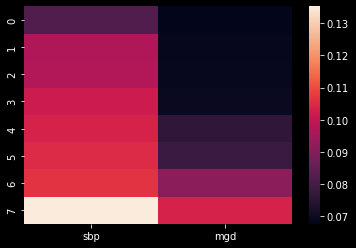

In [55]:
display(sns.heatmap(midias_mean))

Без нормализации, мы можем прикинуть, что средний размер Санкт-Петербургских мидий будет относиться к Магаданским следующим образом:

In [56]:
print(stat.mean(spb)/stat.mean(mgd))

difa = stat.mean(spb) - stat.mean(mgd) * 1.3

print(difa)

1.3259779797193674
0.0020266071428571425


Грубо упрощая, в среднем, мидия СПБ в 1,3 раза большее мидии Магадана.

Но увидим ли мы какую-нибудь корреляцию, если попробуем эти данные нормализовать? Например, с помощью RobustScaler?

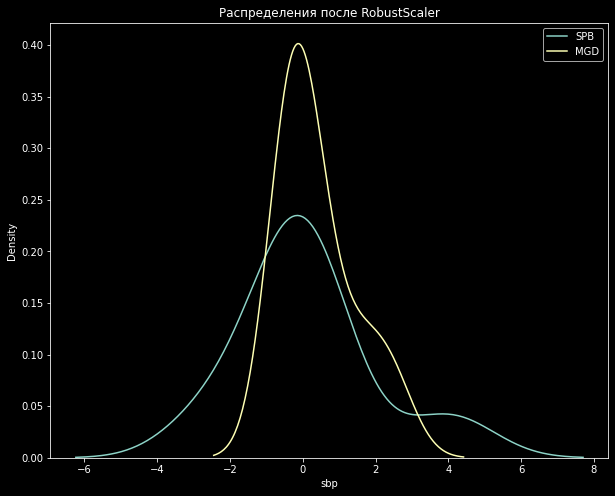

In [57]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

col_names = list(midias_mean.columns)

r_scaler = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(midias_mean)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r.iloc[:,0], ax=ax1, label ='SPB')
sns.kdeplot(df_r.iloc[:,1], ax=ax1, label ='MGD')

plt.legend()

Как видно, данные из Магадана сильно сконцентрированы у середины, тогда как в случае СпБ можно наблюдать почти ровный и мягкий колокол. Попробуем выровнять их по высоте с помощью StandardScaler.

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='sbp', ylabel='Density'>

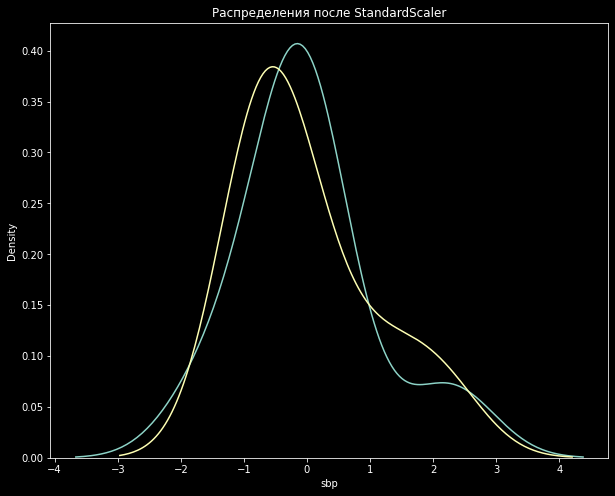

In [58]:
s_scaler = preprocessing.StandardScaler()

df_s = s_scaler.fit_transform(df_r)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s.iloc[:,0], ax=ax1, label ='SPB')
sns.kdeplot(df_s.iloc[:,1], ax=ax1, label ='MGD')

После дополнительной стандартизации, мы видим более-менее нормальное распределение у обоих графиков. Это подтверждается независимым Т-тестом.

In [63]:
from scipy.stats import ttest_ind

print(t_test(df_s))


*** Результаты независимого T-теста ***
1.0 > 0.05. Мы не можем отвергнуть нулевую гипотезу.            Данные распределены нормально
None


Ну конечно, да.

<AxesSubplot:>

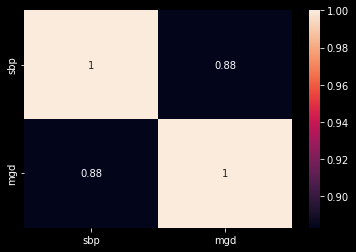

In [60]:
sns.heatmap(df_s.corr(), annot = True)

<AxesSubplot:xlabel='sbp', ylabel='mgd'>

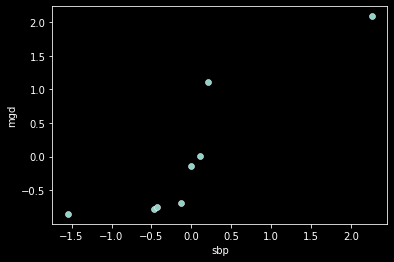

In [61]:
sns.scatterplot(data=df_s, x=df_s.iloc[:,0], y=df_s.iloc[:,1])

<AxesSubplot:xlabel='sbp', ylabel='mgd'>

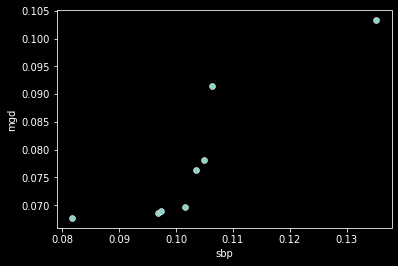

In [62]:
sns.scatterplot(data=midias_mean,\
    x=midias_mean.iloc[:,0], y=midias_mean.iloc[:,1])

Не смотря на то, как нормализация и стандартизация изменили корреляцию между признаками нашего датафрейма, их корреляция предсказуемо не изменилась.

Можно сказать, что она якобы высока, и между "признаками" существует положительное отношение – они располагаются вблизи диагонали на скаттерплоте.

Но куда большую роль здесь играет то, как эти две выборки ничтожны, что на вышеуказанном графике какой-то тренд проследить проблематично.

Несомненно и удивительно одно: если верить этой выборке, мидиями стоит тарится в Санкт-Петербурге.

**Таким образом, можно заключить, что:**

1. Нулевая гипотеза о равенстве средних значений не подтвердилась;
1. Нулевая гипотеза о нормальности признаков – тоже;
1. Средняя питерская мидия, как правило, в 1.3 раза больше мидии магаданской;
1. А высокая корреляция указывает на то, что внутри каждого набора наблюдений, с этой поправкой, существует сильно схожее распределение размеров мидий.